<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/UnsupervisedLearning_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:

#dataset
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

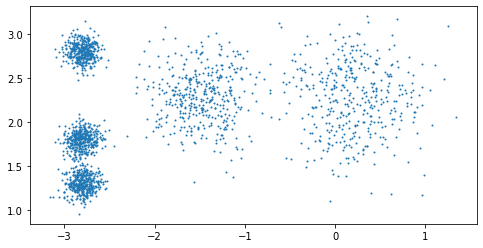

In [3]:
#dataset plot
plt.figure(figsize=(8, 4))
plt.scatter(X[:,0], X[:,1], s=1)
plt.show()

In [4]:
#k-mean
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
print(y_pred, y_pred.shape)
print(kmeans.labels_, y_pred is kmeans.labels_)
print(kmeans.cluster_centers_, kmeans.cluster_centers_.shape)

[3 1 2 ... 4 2 1] (2000,)
[3 1 2 ... 4 2 1] True
[[-1.46679593  2.28585348]
 [-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-2.80037642  1.30082566]
 [-2.79290307  2.79641063]] (5, 2)


In [5]:
#new datat predict
X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
print(kmeans.predict(X_new))

[2 2 4 4]


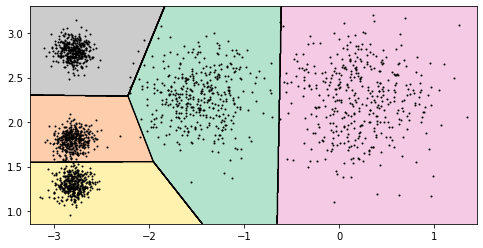

[[1.49439034 2.81093633 0.32995317 2.88633901 2.9042344 ]
 [4.4759332  5.80730058 2.80290755 5.84236351 5.84739223]
 [1.69136631 1.21475352 3.29399768 1.71086031 0.29040966]
 [1.54808703 0.72581411 3.21806371 1.21567622 0.36159148]]


In [6]:
#결정 경계
def plot_decision_boundaries(cluster):
    plt.figure(figsize=(8, 4))
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], num=1000), np.linspace(mins[1], maxs[1], num=1000))

    Z = cluster.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #1000x1000 개의 픽셀지점에 cluster을 지정함
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plt.plot(X[:,0], X[:,1], 'k.', markersize=2)
    plt.show()

plot_decision_boundaries(kmeans)

print(kmeans.transform(X_new))

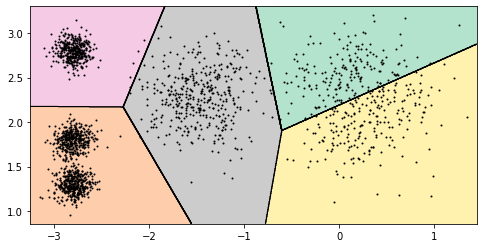

In [7]:
#random cluster
kmeans_random = KMeans(n_clusters=k, init='random', n_init=1)
kmeans_random.fit(X)

plot_decision_boundaries(kmeans_random)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=5
  after removing the cwd from sys.path.


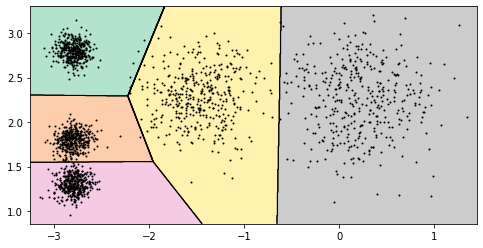

In [8]:
#초기화
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0,2]])
kmeans_init = KMeans(n_clusters=k, init=good_init, n_init=5)
kmeans_init.fit(X)

plot_decision_boundaries(kmeans_init)

In [9]:
#이니셔 값
print(kmeans.inertia_, kmeans_random.inertia_, kmeans_init.inertia_)

211.5985372581684 219.45386798941513 211.5985372581684


In [10]:
from sklearn.cluster import MiniBatchKMeans

mini_batch_kmeans = MiniBatchKMeans(n_clusters=k)
mini_batch_kmeans.fit(X)
#mini_batch_kmeans.partial_fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

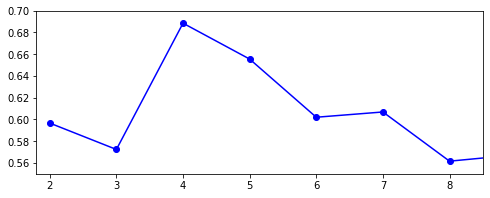

In [11]:
#최적의 클러스터 개수 찾기
from sklearn.metrics import silhouette_score

#print(silhouette_score(X, kmeans.labels_))

#1~9개의 클러스터를 가진 kmeans 배열
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [12]:
kmeans_per_k[0].labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

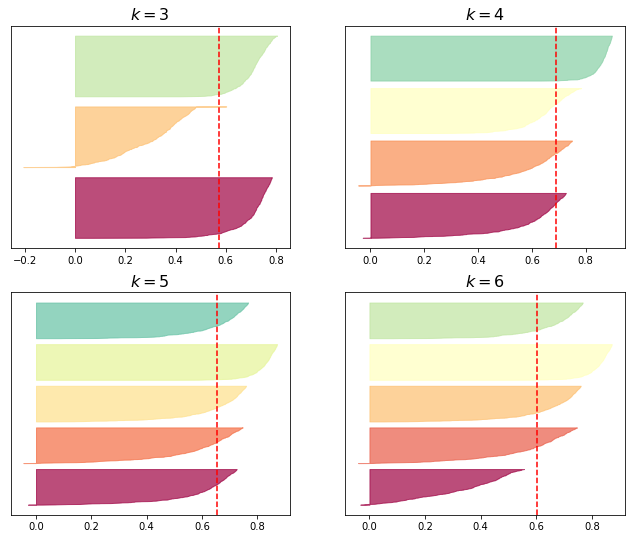

In [13]:
#실루엣 다이어그램

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3,4,5,6):
    plt.subplot(2, 2, k-2)

    padding = len(X) // 30
    pos = padding
    ticks = []

    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    for i in range(k):
        coeffs = silhouette_coefficients[y == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        pos += len(coeffs) + padding
    
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

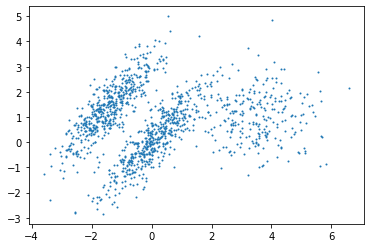

In [14]:
#원형이 아닌 데이터셋
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]


plt.scatter(X[:, 0], X[:, 1], s=1)
plt.show()

2242.55042126599 0.42330347255623246


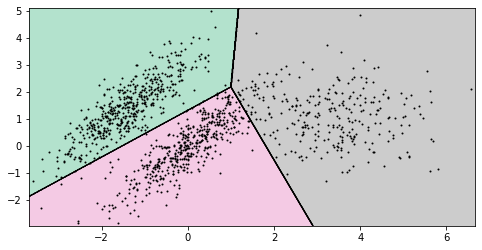

2179.6660887080325 0.3746488377389303


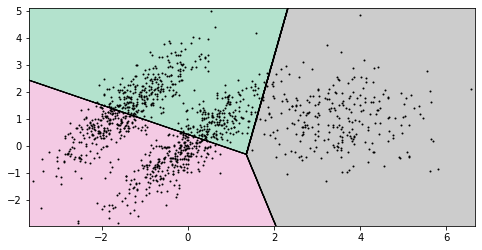

In [15]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

#이니셔, 실루엣점수
#결정 경계
print(kmeans_good.inertia_, silhouette_score(X, kmeans_good.labels_))
plot_decision_boundaries(kmeans_good)
print(kmeans_bad.inertia_,  silhouette_score(X, kmeans_bad.labels_))
plot_decision_boundaries(kmeans_bad)

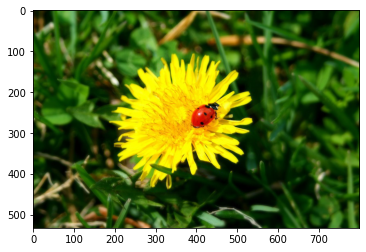

In [16]:
#군집을 사용한 이미지 분할
#색상 분할
from matplotlib.image import imread
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, filename)

image = imread(filename) #0~1
plt.imshow(image)

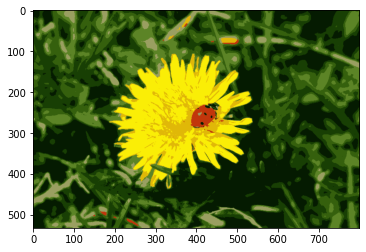

In [17]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)

#각 픽셀에 할당된 클러스터 label에 맞게 픽셀값으로 클러스터 센트로이드 값을 넣는다.
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img)

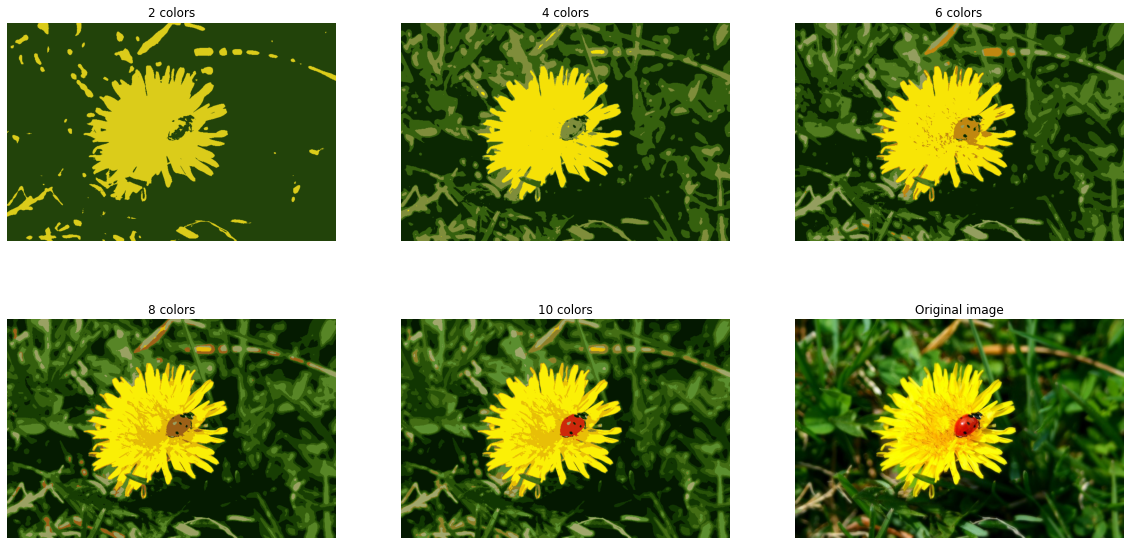

In [22]:
n_clusters = (2, 4, 6, 8, 10)
segmented_imgs = []
for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))


plt.figure(figsize=(20,10))

plt.subplot(236)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_cluster in enumerate(n_clusters):
    plt.subplot(231 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_cluster))
    plt.axis('off')
plt.show()

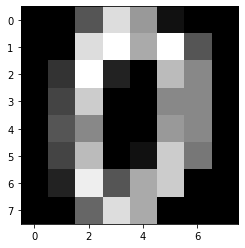

In [38]:
#군집을 통한 차원 축소
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

plt.imshow(X_digits[0].reshape(8,8), cmap='gray')

In [43]:
#전처리 없이
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

#군집 전처리
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                    ('kmeans', KMeans(n_clusters=50)),
                    ('log_reg', LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

0.9666666666666667
0.98


In [46]:
#최적의 클러스터수 찾아보기
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(30,110))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

from IPython.display import clear_output
clear_output()

print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 83}
0.9777777777777777
